### Ok Ok, lets start with the reference-data


In [59]:
from pathlib import Path
from collections import defaultdict
import pandas as pd

year_files = defaultdict(list)
dest = Path('./data/education-ni/')
for year_p in dest.iterdir():
    try:
        year=int(year_p.parts[-1])
        for file in year_p.iterdir():
            year_files[year].append(file.parts[-1])
    except ValueError:
        pass
    
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

year_files = dict(sorted(year_files.items()))
year_files

{2009: ['pre-school-data-0910-3.xlsx',
  'post-primary-schools-data-0910-supp-2.xlsx',
  'primary-schools-data-0910-supp-r.xlsx',
  'special-school-data-0910-supp-3.xlsx',
  'nursery-schools-data-0910-supp-3.xlsx'],
 2010: ['special-school-data-1011-supp-2.xlsx',
  'primary-schools-data-1011-supp-inc-unfilled-r.xlsx',
  'post-primary-schools-data-10-11-supp-inc-unfilled.xlsx',
  'pre-school-data-1011-3.xlsx',
  'nursery-schools-data-2010-11-supp-inc-unfilled.xlsx'],
 2011: ['post-primary-schools-data-11-12-supp-inc-unfilled-2.xlsx',
  'nursery-schools-data-2011-12-supp-inc-unfilled-2.xlsx',
  'primary-schools-data-11-12-supp-inc-unfilled-places-r.xlsx',
  'special-school-data-11-12-supp.xlsx',
  'pre-school-data-2011-12.xlsx'],
 2012: ['nursery-schools-data-2012-13-supp-inc-unfilled-places.xlsx',
  'post-primary-schools-data-2012-13-supp-inc-unfilled-places.xlsx',
  'primary-schools-data-2012-13-supp-inc-unfilled-places-2.xlsx',
  'pre-school-data-2012-13.xlsx',
  'special-school-data-

In [60]:
for year, files in year_files.items():
    print(year)

2009
2010
2011
2012
2013
2014
2015
2016
2017


In [46]:
sheets = defaultdict(list)
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            print(file)

post-primary-schools-data-13-14-supp-inc-unfilled-places.xlsx
post-primary-schools-data-1415-supp-with-unfilled-places.xlsx
School-level-post-primary-schools-data-1516_1.XLS
post-primary-schools-data-2012-13-supp-inc-unfilled-places.xlsx
post-primary-schools-data-0910-supp-2.xlsx
available%20places%20-%20post-primary%201718%20supp.xlsx
School%20level%20-%20post%20primary%20schools%20data%20supp%201718.xls
post-primary-schools-data-10-11-supp-inc-unfilled.xlsx
post-primary-schools-data-11-12-supp-inc-unfilled-2.xlsx
School%20level%20-%20post%20primary%20schools%20data%201617%20supp_0.XLS
available%20places%20-%20post-primary%201617%20supp.XLSX


In [47]:
xls = pd.ExcelFile(f'data/education-ni/2017/School%20level%20-%20post%20primary%20schools%20data%20supp%201718.xls')
df = pd.read_excel(xls, 'reference data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Data on Pupils attending post primary schools ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,school,parliamentary,district,urban/
3,De ref,school name,address 1,town,postcode,school type,management type,constituency,council,rural
4,1210014,Ashfield Girls' High School,397 HOLYWOOD ROAD,BELFAST,BT42LY,Non-grammar,Controlled,BELFAST EAST,BELFAST,Urban


In [48]:
join_n_strip = lambda l: ' '.join(l).strip()

df.ix[1:3].fillna('').apply(join_n_strip, axis=0)

0                        De ref
1                   school name
2                     address 1
3                          town
4                      postcode
5                   school type
6        school management type
7    parliamentary constituency
8              district council
9                  urban/ rural
dtype: object

In [49]:
df.columns=df.ix[1:3].fillna('').apply(join_n_strip, axis=0).values
df

,De ref,school name,address 1,town,postcode,school type,school management type,parliamentary constituency,district council,urban/ rural
0,Data on Pupils attending post primary schools ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,school,parliamentary,district,urban/
3,De ref,school name,address 1,town,postcode,school type,management type,constituency,council,rural
4,1210014,Ashfield Girls' High School,397 HOLYWOOD ROAD,BELFAST,BT42LY,Non-grammar,Controlled,BELFAST EAST,BELFAST,Urban
5,1210015,Ashfield Boys' High School,395 HOLYWOOD ROAD,BELFAST,BT42LY,Non-grammar,Controlled,BELFAST EAST,BELFAST,Urban
6,1210021,Belfast Model School For Girls,35 DUNOWEN GARDENS,BELFAST,BT146NQ,Non-grammar,Controlled,BELFAST NORTH,BELFAST,Urban
7,1210022,Belfast Boys' Model School,BALLYSILLAN ROAD,BELFAST,BT146RB,Non-grammar,Controlled,BELFAST NORTH,BELFAST,Urban
8,1230053,St Louise's Comprehensive College,468 FALLS ROAD,BELFAST,BT126EN,Non-grammar,Catholic Maintained,BELFAST WEST,BELFAST,Urban
9,1230104,Mercy College Belfast,BALLYSILLAN ROAD,BELFAST,BT147QR,Non-grammar,Catholic Maintained,BELFAST NORTH,BELFAST,Urban


In [50]:
df = df.drop(df.index[0:4]).reset_index(drop=True)
df

,De ref,school name,address 1,town,postcode,school type,school management type,parliamentary constituency,district council,urban/ rural
0,1210014,Ashfield Girls' High School,397 HOLYWOOD ROAD,BELFAST,BT42LY,Non-grammar,Controlled,BELFAST EAST,BELFAST,Urban
1,1210015,Ashfield Boys' High School,395 HOLYWOOD ROAD,BELFAST,BT42LY,Non-grammar,Controlled,BELFAST EAST,BELFAST,Urban
2,1210021,Belfast Model School For Girls,35 DUNOWEN GARDENS,BELFAST,BT146NQ,Non-grammar,Controlled,BELFAST NORTH,BELFAST,Urban
3,1210022,Belfast Boys' Model School,BALLYSILLAN ROAD,BELFAST,BT146RB,Non-grammar,Controlled,BELFAST NORTH,BELFAST,Urban
4,1230053,St Louise's Comprehensive College,468 FALLS ROAD,BELFAST,BT126EN,Non-grammar,Catholic Maintained,BELFAST WEST,BELFAST,Urban
5,1230104,Mercy College Belfast,BALLYSILLAN ROAD,BELFAST,BT147QR,Non-grammar,Catholic Maintained,BELFAST NORTH,BELFAST,Urban
6,1230130,St Rose’s Dominican College,65 BEECHMOUNT AVENUE,BELFAST,BT127NA,Non-grammar,Catholic Maintained,BELFAST WEST,BELFAST,Urban
7,1230146,"Christian Brothers School, Belfast",GLEN ROAD,BELFAST,BT118BW,Non-grammar,Catholic Maintained,BELFAST WEST,BELFAST,Urban
8,1230155,St Genevieve's High School,TRENCH HOUSE,BELFAST,BT119JP,Non-grammar,Catholic Maintained,BELFAST WEST,BELFAST,Urban
9,1230182,De La Salle College,36 EDENMORE DRIVE,BELFAST,BT118LT,Non-grammar,Catholic Maintained,BELFAST WEST,BELFAST,Urban


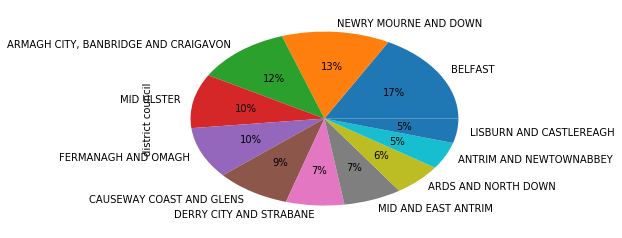

In [51]:
df['district council'].value_counts().plot.pie(autopct='%1.0f%%')

![](img/itshappening.webp)

In [61]:
def parse_reference_table(xls):
    if 'reference data' in xls.sheet_names:
        df = pd.read_excel(xls, 'reference data', header=None)
        join_n_strip = lambda l: ' '.join(l).strip()
        df.columns=df.ix[1:3].fillna('').apply(join_n_strip, axis=0).values
        df = df.drop(df.index[0:4]).reset_index(drop=True)
    else:
        df=None
    return df

for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_reference_table(xls)
            if df is not None:
                print(f'Got reference data for {year}')


TypeError: ('sequence item 2: expected str instance, int found', 'occurred at index 0')

In [62]:
def parse_reference_table(xls):
    if 'reference data' in xls.sheet_names:
        df = pd.read_excel(xls, 'reference data', header=None)
        join_n_strip = lambda l: ' '.join(l).strip()
        try:
            df.columns=df.ix[1:3].fillna('').apply(join_n_strip, axis=0).values
            df = df.drop(df.index[0:4]).reset_index(drop=True)
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_reference_table(xls)
            if df is not None:
                print(f'Got reference data for {year}')


('sequence item 2: expected str instance, int found', 'occurred at index 0')
Got reference data for 2009
('sequence item 2: expected str instance, int found', 'occurred at index 0')
Got reference data for 2010
('sequence item 2: expected str instance, int found', 'occurred at index 0')
Got reference data for 2011
('sequence item 2: expected str instance, int found', 'occurred at index 0')
Got reference data for 2012
('sequence item 2: expected str instance, int found', 'occurred at index 0')
Got reference data for 2013
Got reference data for 2014
Got reference data for 2015
Got reference data for 2016
Got reference data for 2017


In [63]:
df.head()

,De ref,school name,address 1,town,postcode,school type,school management type,parliamentary constituency,district council,urban/ rural
0,1210014,Ashfield Girls' High School,397 HOLYWOOD ROAD,BELFAST,BT42LY,Non-grammar,Controlled,BELFAST EAST,BELFAST,Urban
1,1210015,Ashfield Boys' High School,395 HOLYWOOD ROAD,BELFAST,BT42LY,Non-grammar,Controlled,BELFAST EAST,BELFAST,Urban
2,1210021,Belfast Model School For Girls,35 DUNOWEN GARDENS,BELFAST,BT146NQ,Non-grammar,Controlled,BELFAST NORTH,BELFAST,Urban
3,1210022,Belfast Boys' Model School,BALLYSILLAN ROAD,BELFAST,BT146RB,Non-grammar,Controlled,BELFAST NORTH,BELFAST,Urban
4,1230053,St Louise's Comprehensive College,468 FALLS ROAD,BELFAST,BT126EN,Non-grammar,Catholic Maintained,BELFAST WEST,BELFAST,Urban


In [64]:
join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()

def parse_reference_table(xls):
    if 'reference data' in xls.sheet_names:
        df = pd.read_excel(xls, 'reference data', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[1:h_range].fillna('').apply(join_n_strip_n_lower, axis=0).values
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

dfs = {}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_reference_table(xls)
            if df is not None:
                print(f'Got reference data for {year}')
                dfs[year]=df


Got reference data for 2009
Got reference data for 2010
Got reference data for 2011
Got reference data for 2012
Got reference data for 2013
Got reference data for 2014
Got reference data for 2015
Got reference data for 2016
Got reference data for 2017


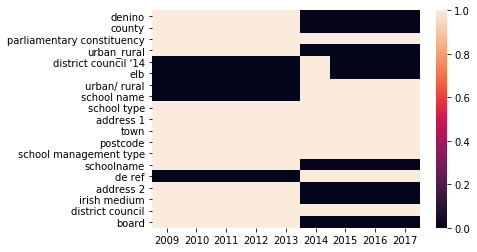

In [65]:
import seaborn as sns 

all_keys = set([k for df in dfs.values() for k in df.keys() ])
df = pd.DataFrame.from_dict({
    year: [k in df.keys() for k in all_keys]
    for year, df in dfs.items()
}, orient='index')
df.columns=all_keys
sns.heatmap(df.T)

In [66]:
ref_key_map={
    'denino':'de ref',
    'urban/ rural': 'urban_rural',
    'schoolname': 'school name'
}
join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()

def parse_reference_table(xls):
    if 'reference data' in xls.sheet_names:
        df = pd.read_excel(xls, 'reference data', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[1:h_range].fillna('').apply(join_n_strip_n_lower, axis=0).values
            df.rename(columns=ref_key_map, inplace=True)
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

Got reference data for 2009
Got reference data for 2010
Got reference data for 2011
Got reference data for 2012
Got reference data for 2013
Got reference data for 2014
Got reference data for 2015
Got reference data for 2016
Got reference data for 2017


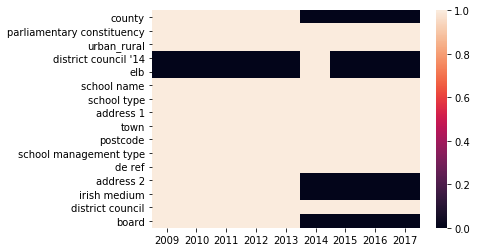

In [67]:
dfs = {}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_reference_table(xls)
            if df is not None:
                print(f'Got reference data for {year}')
                dfs[year]=df
                
all_keys = set([k for df in dfs.values() for k in df.keys() ])
df = pd.DataFrame.from_dict({
    year: [k in df.keys() for k in all_keys]
    for year, df in dfs.items()
}, orient='index')
df.columns=all_keys
sns.heatmap(df.T)

In [68]:
cols = [k for k,v in zip(df.columns, df.all()) if v]
cols

['parliamentary constituency',
 'urban_rural',
 'school name',
 'school type',
 'address 1',
 'town',
 'postcode',
 'school management type',
 'de ref',
 'district council']

Got reference data for 2009
Got reference data for 2010
Got reference data for 2011
Got reference data for 2012
Got reference data for 2013
Got reference data for 2014
Got reference data for 2015
Got reference data for 2016
Got reference data for 2017


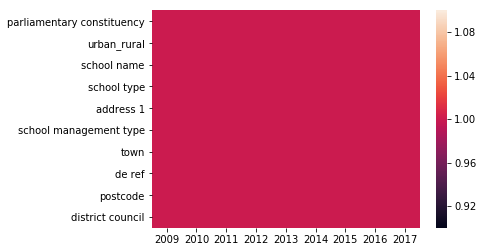

In [69]:


def parse_reference_table(xls):
    cols = [
        'de ref',
        'school name',
        'school type',
        'address 1',
        'postcode',
        'urban_rural',
        'school management type',
        'district council',
        'parliamentary constituency',
        'town'
    ]

    ref_key_map={
        'denino':'de ref',
        'urban/ rural': 'urban_rural',
        'schoolname': 'school name'
    }
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    
    if 'reference data' in xls.sheet_names:
        df = pd.read_excel(xls, 'reference data', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[1:h_range].fillna('').apply(join_n_strip_n_lower, axis=0).values
            df.rename(columns=ref_key_map, inplace=True)
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df = df[cols]
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

dfs = {}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_reference_table(xls)
            if df is not None:
                print(f'Got reference data for {year}')
                dfs[year]=df
                
all_keys = set([k for df in dfs.values() for k in df.keys() ])
df = pd.DataFrame.from_dict({
    year: [k in df.keys() for k in all_keys]
    for year, df in dfs.items()
}, orient='index')
df.columns=all_keys
sns.heatmap(df.T)

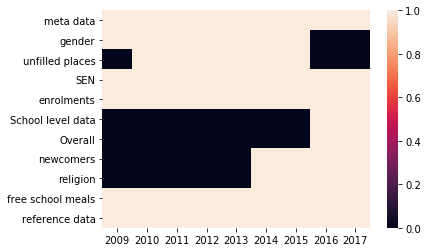

In [70]:
sheets = defaultdict(list)
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            sheets[year].extend(xls.sheet_names)

all_sheet_names = set([_ for d in sheets.values() for _ in d])
df = pd.DataFrame.from_dict({
    year: [sn in sheet_names for sn in all_sheet_names] 
    for year, sheet_names in sheets.items()
}, orient='index')
df.columns=all_sheet_names
sns.heatmap(df.T)

In [71]:
df.keys()

Index(['meta data', 'gender', 'unfilled places', 'SEN', 'enrolments',
       'School level data', 'Overall', 'newcomers', 'religion',
       'free school meals', 'reference data'],
      dtype='object')

![](img/enrolements_2017.png)

In [72]:
xls = pd.ExcelFile(f'data/education-ni/2017/School%20level%20-%20post%20primary%20schools%20data%20supp%201718.xls')
df = pd.read_excel(xls, 'enrolments', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Data on Pupils attending post primary schools ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,year of enrolment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DE ref,Schoolname,year 8,year 9,year 10,year 11,year 12,year 13,year 14,total pupils
4,1210014,Ashfield Girls' High School,124,114,119,111,113,60,50,691


In [73]:
def parse_enrolments_table(xls):
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    
    if 'enrolments' in xls.sheet_names:
        df = pd.read_excel(xls, 'enrolments', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[1:h_range].fillna('').apply(join_n_strip_n_lower, axis=0).values
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
        except TypeError as e:
            print(e)
    else:
        df=None
    return df
df= parse_enrolments_table(xls)
df

,de ref,schoolname,year of enrolment year 8,year 9,year 10,year 11,year 12,year 13,year 14,total pupils
0,1210014,Ashfield Girls' High School,124,114,119,111,113,60,50,691
1,1210015,Ashfield Boys' High School,126,121,117,121,111,84,60,740
2,1210021,Belfast Model School For Girls,167,160,162,139,121,127,70,946
3,1210022,Belfast Boys' Model School,174,179,165,154,160,89,76,997
4,1230053,St Louise's Comprehensive College,236,194,189,206,264,160,186,1435
5,1230104,Mercy College Belfast,76,66,71,76,73,71,17,450
6,1230130,St Rose’s Dominican College,16,25,32,37,37,72,24,243
7,1230146,"Christian Brothers School, Belfast",107,70,95,47,40,87,79,525
8,1230155,St Genevieve's High School,164,161,152,152,165,138,90,1022
9,1230182,De La Salle College,109,165,164,161,173,119,67,958


In [74]:
df.set_index('de ref')

,schoolname,year of enrolment year 8,year 9,year 10,year 11,year 12,year 13,year 14,total pupils
de ref,,,,,,,,,
1210014,Ashfield Girls' High School,124,114,119,111,113,60,50,691
1210015,Ashfield Boys' High School,126,121,117,121,111,84,60,740
1210021,Belfast Model School For Girls,167,160,162,139,121,127,70,946
1210022,Belfast Boys' Model School,174,179,165,154,160,89,76,997
1230053,St Louise's Comprehensive College,236,194,189,206,264,160,186,1435
1230104,Mercy College Belfast,76,66,71,76,73,71,17,450
1230130,St Rose’s Dominican College,16,25,32,37,37,72,24,243
1230146,"Christian Brothers School, Belfast",107,70,95,47,40,87,79,525
1230155,St Genevieve's High School,164,161,152,152,165,138,90,1022


In [75]:
def parse_enrolments_table(xls):
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    strip_n_lower = lambda s: s.strip().lower()
    
    if 'enrolments' in xls.sheet_names:
        df = pd.read_excel(xls, 'enrolments', header=None, skip_footer=5)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[3].fillna('').apply(strip_n_lower).values
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df.dropna(how='all', inplace=True, axis=0)
            
        except TypeError as e:
            print(e)
    else:
        df=None
    return df
parse_enrolments_table(xls).tail()

,de ref,schoolname,year 8,year 9,year 10,year 11,year 12,year 13,year 14,total pupils
194,5420260,"The Royal School, Dungannon",93,96,107,93,105,74,70,638
195,5420263,"The Royal School, Armagh",103,103,99,108,106,103,113,735
196,5420268,"St Patrick's Grammar School, Armagh",126,164,132,155,156,126,108,967
197,5420304,"St Patrick's Academy, Dungannon",197,198,198,189,200,176,182,1340
198,5420314,St Ronan’s College,285,243,207,182,249,157,146,1469


In [76]:
df  = parse_enrolments_table(xls).set_index('de ref').drop('schoolname', axis=1)
df

,year 8,year 9,year 10,year 11,year 12,year 13,year 14,total pupils
de ref,,,,,,,,
1210014,124,114,119,111,113,60,50,691
1210015,126,121,117,121,111,84,60,740
1210021,167,160,162,139,121,127,70,946
1210022,174,179,165,154,160,89,76,997
1230053,236,194,189,206,264,160,186,1435
1230104,76,66,71,76,73,71,17,450
1230130,16,25,32,37,37,72,24,243
1230146,107,70,95,47,40,87,79,525
1230155,164,161,152,152,165,138,90,1022


In [77]:
df[[c for c in df if c.startswith('year')]]

,year 8,year 9,year 10,year 11,year 12,year 13,year 14
de ref,,,,,,,
1210014,124,114,119,111,113,60,50
1210015,126,121,117,121,111,84,60
1210021,167,160,162,139,121,127,70
1210022,174,179,165,154,160,89,76
1230053,236,194,189,206,264,160,186
1230104,76,66,71,76,73,71,17
1230130,16,25,32,37,37,72,24
1230146,107,70,95,47,40,87,79
1230155,164,161,152,152,165,138,90


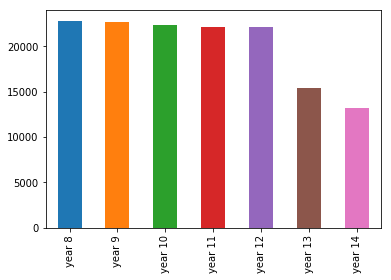

In [78]:
df[[c for c in df if c.startswith('year')]].sum().plot.bar()

In [79]:
my_totals = df[[c for c in df if c.startswith('year')]].sum(axis=1)
their_totals = df['total pupils']
any(my_totals!=their_totals)

False

In [80]:
dfs = {}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_enrolments_table(xls)
            if df is not None:
                print(f'Got enrolement data for {year}')
                dfs[year]=df

Got enrolement data for 2009
Got enrolement data for 2010
Got enrolement data for 2011
Got enrolement data for 2012
Got enrolement data for 2013
Got enrolement data for 2014
Got enrolement data for 2015
Got enrolement data for 2016
Got enrolement data for 2017


In [81]:
all_de_refs = set([_ for d in dfs.values() for _ in d['de ref'].values])
all_de_refs

{1210014,
 1210015,
 1210021,
 1210022,
 1210266,
 1230026,
 1230053,
 1230089,
 1230104,
 1230130,
 1230146,
 '1230155',
 1230155,
 '1230155 ',
 1230173,
 '1230173',
 '1230173 ',
 1230182,
 '1230182',
 '1230182 ',
 1230262,
 '1230275',
 1230275,
 '1230275 ',
 1230321,
 1240291,
 1260269,
 1260294,
 1410079,
 1410270,
 1410315,
 1420018,
 1420020,
 1420021,
 1420022,
 1420027,
 1420028,
 1420029,
 1420030,
 1420082,
 1420089,
 1420095,
 1420264,
 1420265,
 1420277,
 2210065,
 2210080,
 2210125,
 2210164,
 2210302,
 2210305,
 2210306,
 2210312,
 2230077,
 2230081,
 2230085,
 2230099,
 2230100,
 2230109,
 2230111,
 2230122,
 2230131,
 2230138,
 2230144,
 2230148,
 2230166,
 2230180,
 2230181,
 2230188,
 2230190,
 2230225,
 2230254,
 2230298,
 2230301,
 2230322,
 2240319,
 2260276,
 2260280,
 2260283,
 2410040,
 2410048,
 2410066,
 2410096,
 2410311,
 2420041,
 2420042,
 2420043,
 2420052,
 2420054,
 2420064,
 2420065,
 2420229,
 2420287,
 2420320,
 3210013,
 3210035,
 3210038,
 3210091,


In [82]:
all_de_refs = set([int(_) for d in dfs.values() for _ in d['de ref'].values])
all_de_refs

{1210014,
 1210015,
 1210021,
 1210022,
 1210266,
 1230026,
 1230053,
 1230089,
 1230104,
 1230130,
 1230146,
 1230155,
 1230173,
 1230182,
 1230262,
 1230275,
 1230321,
 1240291,
 1260269,
 1260294,
 1410079,
 1410270,
 1410315,
 1420018,
 1420020,
 1420021,
 1420022,
 1420027,
 1420028,
 1420029,
 1420030,
 1420082,
 1420089,
 1420095,
 1420264,
 1420265,
 1420277,
 2210065,
 2210080,
 2210125,
 2210164,
 2210302,
 2210305,
 2210306,
 2210312,
 2230077,
 2230081,
 2230085,
 2230099,
 2230100,
 2230109,
 2230111,
 2230122,
 2230131,
 2230138,
 2230144,
 2230148,
 2230166,
 2230180,
 2230181,
 2230188,
 2230190,
 2230225,
 2230254,
 2230298,
 2230301,
 2230322,
 2240319,
 2260276,
 2260280,
 2260283,
 2410040,
 2410048,
 2410066,
 2410096,
 2410311,
 2420041,
 2420042,
 2420043,
 2420052,
 2420054,
 2420064,
 2420065,
 2420229,
 2420287,
 2420320,
 3210013,
 3210035,
 3210038,
 3210091,
 3210124,
 3210133,
 3210134,
 3210172,
 3210200,
 3210202,
 3210208,
 3210222,
 3210232,
 3210233,


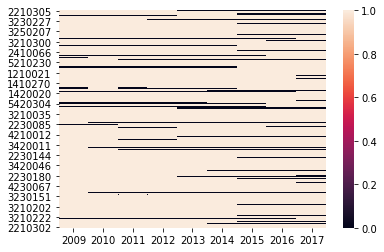

In [83]:
df = pd.DataFrame.from_dict({
    year: [dr in df['de ref'].values for dr in all_de_refs] 
    for year, df in dfs.items()
}, orient='index')
df.columns=all_de_refs
sns.heatmap(df.T)

In [84]:
for year, df in dfs.items():
    print(f"{year}:{df.keys().values}")

2009:['de ref' 'schoolname' 'year 8' 'year 9' 'year 10' 'year 11' 'year 12'
 'year 13' 'year 14' 'year 15' 'total pupils']
2010:['de ref' 'schoolname' 'year 8' 'year 9' 'year 10' 'year 11' 'year 12'
 'year 13' 'year 14' 'year 15' 'total pupils']
2011:['de ref' 'schoolname' 'year 8' 'year 9' 'year 10' 'year 11' 'year 12'
 'year 13' 'year 14' 'year 15' 'total pupils']
2012:['de ref' 'schoolname' 'year 8' 'year 9' 'year 10' 'year 11' 'year 12'
 'year 13' 'year 14' 'year 15' 'total pupils']
2013:['de ref' 'schoolname' 'year 8' 'year 9' 'year 10' 'year 11' 'year 12'
 'year 13' 'year 14' 'year 15' 'total pupils']
2014:['de ref' 'schoolname' 'year 8' 'year 9' 'year 10' 'year 11' 'year 12'
 'year 13' 'year 14' 'year 15' 'total pupils']
2015:['de ref' 'schoolname' 'year 8' 'year 9' 'year 10' 'year 11' 'year 12'
 'year 13' 'year 14' 'year 15' 'total pupils']
2016:['de ref' 'schoolname' 'year 8' 'year 9' 'year 10' 'year 11' 'year 12'
 'year 13' 'year 14' 'total pupils']
2017:['de ref' 'schoolname

## Grand pivot


In [85]:
def parse_enrolments_table(xls):
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    strip_n_lower = lambda s: s.strip().lower()
    unyearify = lambda s: int(s.replace('year ',''))
    
    if 'enrolments' in xls.sheet_names:
        df = pd.read_excel(xls, 'enrolments', header=None, skip_footer=5)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[3].fillna('').apply(strip_n_lower).values
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df.dropna(how='all', inplace=True, axis=0)
            df['de ref'] = df['de ref'].astype(int)
            df.drop('schoolname',axis=1, inplace=True)
            df.drop('total pupils',axis=1, inplace=True)
            df.set_index('de ref', inplace=True)
            df.rename(columns=unyearify, inplace=True)
            df=df.astype(float)
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

dfs = {}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_enrolments_table(xls)
            if df is not None:
                print(f'Got enrolement data for {year}')
                dfs[year]=df


Got enrolement data for 2009
Got enrolement data for 2010
Got enrolement data for 2011
Got enrolement data for 2012
Got enrolement data for 2013
Got enrolement data for 2014
Got enrolement data for 2015
Got enrolement data for 2016
Got enrolement data for 2017


In [86]:
panel = pd.Panel(dfs)
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 9 (items) x 232 (major_axis) x 8 (minor_axis)
Items axis: 2009 to 2017
Major_axis axis: 1210014 to 5420314
Minor_axis axis: 8 to 15

In [87]:
panel.sum(axis=1)


,2009,2010,2011,2012,2013,2014,2015,2016,2017
8,23116.0,23113.0,21770.0,21322.0,21418.0,21367.0,21792.0,22571.0,22817.0
9,23859.0,23403.0,22925.0,21928.0,21425.0,21481.0,21422.0,22284.0,22650.0
10,22954.0,24155.0,23245.0,23101.0,21971.0,21527.0,21443.0,21864.0,22381.0
11,23521.0,23277.0,24094.0,23524.0,23299.0,22092.0,21601.0,22118.0,22102.0
12,23808.0,23656.0,22967.0,24027.0,23353.0,23166.0,21864.0,22091.0,22099.0
13,14912.0,15652.0,15421.0,15892.0,16567.0,16208.0,15912.0,15667.0,15347.0
14,12607.0,13097.0,13274.0,13482.0,13554.0,14174.0,13922.0,13818.0,13149.0
15,100.0,154.0,154.0,196.0,201.0,275.0,365.0,0.0,0.0


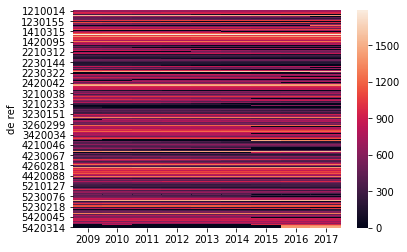

In [88]:
sns.heatmap(panel.sum(axis=2))


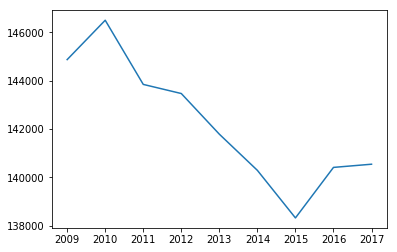

In [89]:
panel.sum().sum().plot()

## Now to start bringing these together!



In [91]:
def parse_enrolments_table(xls):
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    strip_n_lower = lambda s: s.strip().lower()
    unyearify = lambda s: int(s.replace('year ',''))
    
    if 'enrolments' in xls.sheet_names:
        df = pd.read_excel(xls, 'enrolments', header=None, skip_footer=5)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[3].fillna('').apply(strip_n_lower).values
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df.dropna(how='all', inplace=True, axis=0)
            df['de ref'] = df['de ref'].astype(int)
            df.drop('schoolname',axis=1, inplace=True)
            df.drop('total pupils',axis=1, inplace=True)
            df.set_index('de ref', inplace=True)
            df.rename(columns=unyearify, inplace=True)
            df=df.astype(float)
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

dfs = {}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_enrolments_table(xls)
            if df is not None:
                print(f'Got enrolement data for {year}')
                dfs[year]=df
enrolements = pd.Panel(dfs)

Got enrolement data for 2009
Got enrolement data for 2010
Got enrolement data for 2011
Got enrolement data for 2012
Got enrolement data for 2013
Got enrolement data for 2014
Got enrolement data for 2015
Got enrolement data for 2016
Got enrolement data for 2017


In [92]:
def parse_reference_table(xls):
    cols = [
        'de ref',
        'school name',
        'school type',
        'address 1',
        'postcode',
        'urban_rural',
        'school management type',
        'district council',
        'parliamentary constituency',
        'town'
    ]
    
    categories = [
        'school type',
        'urban_rural',
        'school management type',
        'district council',
        'parliamentary constituency',
        'town'
    ]

    ref_key_map={
        'denino':'de ref',
        'urban/ rural': 'urban_rural',
        'schoolname': 'school name'
    }
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    
    if 'reference data' in xls.sheet_names:
        df = pd.read_excel(xls, 'reference data', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[1:h_range].fillna('').apply(join_n_strip_n_lower, axis=0).values
            df.rename(columns=ref_key_map, inplace=True)
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df = df[cols]
            df['de ref'] = df['de ref'].astype(int)
            df.set_index('de ref', inplace=True)
            for c in df:
                 df[c]=df[c].str.lower().str.strip()
            for c in categories:
                df[c] = df[c].astype('category')
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

dfs = {}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_reference_table(xls)
            if df is not None:
                print(f'Got reference data for {year}')
                dfs[year]=df
reference = pd.Panel(dfs)

Got reference data for 2009
Got reference data for 2010
Got reference data for 2011
Got reference data for 2012
Got reference data for 2013
Got reference data for 2014
Got reference data for 2015
Got reference data for 2016
Got reference data for 2017


In [93]:
reference.to_frame()

2009  \
de ref  minor                                                        
1210014 school name                    ashfield girls' high school   
        school type                                      secondary   
        address 1                                    holywood road   
        postcode                                           bt4 2ly   
        urban_rural                                          urban   
        school management type                          controlled   
        district council                                   belfast   
        parliamentary constituency                    belfast east   
        town                                               belfast   
1210015 school name                     ashfield boys' high school   
        school type                                      secondary   
        address 1                                    holywood road   
        postcode                                           bt4 2ly   
        urban_rural                                          urban   
        school management type                          controlled   
        district council                                   belfast   
        parliamentary constituency                    belfast east   
        town                                               belfast   
1210021 school name                 belfast model school for girls   
        school type                                      secondary   
        address 1                                  dunkeld gardens   
        postcode                                          bt14 6nt   
        urban_rural                                          urban   
        school management type                          controlled   
        district council                                   belfast   
        parliamentary constituency                   belfast north   
        town                                               belfast   
1210022 school name                     belfast boys' model school   
        school type                                      secondary   
        address 1                                 ballysillan road   
...                                                            ...   
5420260 district council                                 dungannon   
        parliamentary constituency      fermanagh and south tyrone   
        town                                             dungannon   
5420263 school name                        the royal school armagh   
        school type                                        grammar   
        address 1                                     college hill   
        postcode                                          bt61 9dh   
        urban_rural                                          urban   
        school management type                           voluntary   
        district council                                    armagh   
        parliamentary constituency                newry and armagh   
        town                                                armagh   
5420268 school name                    st patrick's grammar school   
        school type                                        grammar   
        address 1                                   cathedral road   
        postcode                                          bt61 7qz   
        urban_rural                                          urban   
        school management type                           voluntary   
        district council                                    armagh   
        parliamentary constituency                newry and armagh   
        town                                                armagh   
5420304 school name                           st patrick's academy   
        school type                                        grammar   
        address 1                                37 killymeal road   
        postcode                                          bt71 6ds   
  

In [94]:
reference.to_frame().apply(pd.Series.nunique, axis=1)!=1

de ref   minor                     
1210014  school name                   False
         school type                    True
         address 1                      True
         postcode                       True
         urban_rural                   False
         school management type        False
         district council              False
         parliamentary constituency    False
         town                          False
1210015  school name                   False
         school type                    True
         address 1                      True
         postcode                       True
         urban_rural                   False
         school management type        False
         district council              False
         parliamentary constituency    False
         town                          False
1210021  school name                   False
         school type                    True
         address 1                      True
         postcode  

In [95]:
reference.to_frame().apply(pd.Series.nunique, axis=1).unstack('minor').sum()

minor
school name                   252.0
school type                   311.0
address 1                     241.0
postcode                      408.0
urban_rural                   195.0
school management type        364.0
district council              365.0
parliamentary constituency    198.0
town                          187.0
dtype: float64

In [96]:
reference.to_frame()[reference.to_frame().apply(pd.Series.nunique, axis=1)!=1]

2009  \
de ref  minor                                                         
1210014 school type                                       secondary   
        address 1                                     holywood road   
        postcode                                            bt4 2ly   
1210015 school type                                       secondary   
        address 1                                     holywood road   
        postcode                                            bt4 2ly   
1210021 school type                                       secondary   
        address 1                                   dunkeld gardens   
        postcode                                           bt14 6nt   
1210022 school type                                       secondary   
        postcode                                           bt14 6rb   
1230053 school type                                       secondary   
        postcode                                           bt12 6en   
        school management type                        rc maintained   
1230104 school name                 our lady of mercy girls' school   
        school type                                       secondary   
        postcode                                           bt14 7qr   
        school management type                        rc maintained   
1230130 school name                           st rose's high school   
        school type                                       secondary   
        address 1                                 beechmount avenue   
        postcode                                           bt12 7na   
        school management type                        rc maintained   
1230146 school name                       christian brothers school   
        school type                                       secondary   
        postcode                                           bt11 8bw   
        school management type                        rc maintained   
1230155 school type                                       secondary   
        postcode                                           bt11 9jp   
        school management type                        rc maintained   
...                                                             ...   
5420062 school name                             st colman's college   
        postcode                                           bt35 6pp   
        school management type                            voluntary   
        district council                             newry & mourne   
5420073 school name                      st joseph's grammar school   
        postcode                                           bt70 3he   
        school management type                            voluntary   
        district council                                  dungannon   
5420076 school name                     sacred heart grammar school   
        postcode                                           bt34 1pr   
        school management type                            voluntary   
        district council                             newry & mourne   
        parliamentary constituency                 newry and armagh   
5420260 school name                      the royal school dungannon   
        address 1                                  1 ranfurley road   
        postcode                                           bt71 6ap   
        school management type                            voluntary   
        district council                                  dungannon   
5420263 school name                         the royal school armagh   
        postcode                                           bt61 9dh   
        school management type                            voluntary   
        district council                                     armagh   
5420268 school name                     st patrick's grammar school   
        postcode                                           bt61 7qz   
        school m

In [97]:
from collections import Counter
Counter(reference[:,:,'school management type'].values.ravel('k'))

Counter({'catholic maintained': 258,
         'controlled': 628,
         'controlled integrated': 45,
         'gmi': 120,
         'grant maintained integrated': 15,
         nan: 201,
         'other maintained': 12,
         'rc maintained': 282,
         'roman catholic maintained': 71,
         'voluntary': 303,
         'voluntary - other managed': 66,
         'voluntary - rc managed': 87})

In [98]:
reference_value_rename = {
    'school management type':{
         'controlled integrated':'integrated',
         'roman catholic maintained':'rc maintained',
         'grant maintained integrated':'gmi',
         'voluntary - other managed':'other maintained',
         'voluntary - rc managed':'rc maintained',
         'catholic maintained':'rc maintained'
    }
}

In [99]:

import numpy as np
def parse_reference_table(xls):
    cols = [
        'de ref',
        'school name',
        'school type',
        'address 1',
        'postcode',
        'urban_rural',
        'school management type',
        'district council',
        'parliamentary constituency',
        'town'
    ]
    
    categories = [
        'school type',
        'urban_rural',
        'school management type',
        'district council',
        'parliamentary constituency',
        'town'
    ]

    ref_key_map={
        'denino':'de ref',
        'urban/ rural': 'urban_rural',
        'schoolname': 'school name'
    }
    
    reference_value_rename = {
        'school management type':{
             'gmi':'integrated',
             'controlled integrated':'integrated',
             'roman catholic maintained':'rc maintained',
             'grant maintained integrated':'integrated',
             'voluntary - other managed':'voluntary',
             'voluntary - rc managed':'voluntary',
             'catholic maintained':'rc maintained'
        }
    }
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    
    if 'reference data' in xls.sheet_names:
        df = pd.read_excel(xls, 'reference data', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[1:h_range].fillna('').apply(join_n_strip_n_lower, axis=0).values
            df.rename(columns=ref_key_map, inplace=True)
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df = df[cols]
            df['de ref'] = df['de ref'].astype(int)
            df.set_index('de ref', inplace=True)
            for c in df:
                 df[c]=df[c].str.lower().str.strip()            
            df.replace(reference_value_rename, inplace=True)
            for c in categories:
                df[c].fillna('NA', inplace=True)
                df[c] = df[c].astype('category')
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

dfs = {}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_reference_table(xls)
            if df is not None:
                print(f'Got reference data for {year}')
                dfs[year]=df
reference = pd.Panel(dfs)

Got reference data for 2009
Got reference data for 2010
Got reference data for 2011
Got reference data for 2012
Got reference data for 2013
Got reference data for 2014
Got reference data for 2015
Got reference data for 2016
Got reference data for 2017


## Parse Available

In [203]:
"""School level data"""

def parse_available_table(xls):
    ref_key_map={
        'schoolname': 'school name',
        'total unfilled places': 'available places',
        'unfilled places': 'available places',
        'total approved enrolment number': 'approved enrolments'
    }
    
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    
    if 'School level data' in xls.sheet_names:
        df = pd.read_excel(xls, 'School level data', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
    elif 'unfilled places' in xls.sheet_names:
        df = pd.read_excel(xls, 'unfilled places', header=None)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
    else:
        df=None
        
    if df is not None:
        try:
            df.columns=df.ix[1:h_range].fillna('').apply(join_n_strip_n_lower, axis=0).values
            df.rename(columns=ref_key_map, inplace=True)
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df=df.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
            df.dropna(how='all', axis=1, inplace=True)
            df.dropna(how='any', axis=0, inplace=True)
            if df.shape[1] == 6: # recent doesn't have fecking headers
                cols = list(df.columns)
                cols[0] = 'de ref'
                cols[1] = 'school name'
                df.columns=cols
            df.drop('school name', axis=1, inplace=True)
            df['de ref'] = df['de ref'].astype(int)
            df.set_index('de ref', inplace=True)
            df.replace('*',2.0, inplace=True) # * == < 5
            df.replace('!',1, inplace=True) # ! avoid identification, so it's prob one or two
            df.dropna(how='all', inplace=True, axis=1)
            df.astype(int, inplace=True)
            

            
        except TypeError as e:
            print(e)

    return df
dfs={}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_available_table(xls)
            if df is not None:
                print(f'Got available data for {year}')
                dfs[year]=df
                
available = pd.Panel(dfs)
available

Got available data for 2010
Got available data for 2011
Got available data for 2012
Got available data for 2013
Got available data for 2014
Got available data for 2015
Got available data for 2016
Got available data for 2017


<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 229 (major_axis) x 5 (minor_axis)
Items axis: 2010 to 2017
Major_axis axis: 1210014 to 5420314
Minor_axis axis: actual enrolments to supernumerary pupils

In [205]:
available[2013]

,actual enrolments,approved admissions,approved enrolments,available places,supernumerary pupils
de ref,,,,,
1210014,NaN,NaN,660.0,0.0,NaN
1210015,NaN,NaN,600.0,0.0,NaN
1210021,NaN,NaN,950.0,56.0,NaN
1210022,NaN,NaN,905.0,12.0,NaN
1210266,NaN,NaN,548.0,2.0,NaN
1230026,NaN,NaN,780.0,111.0,NaN
1230053,NaN,NaN,2280.0,787.0,NaN
1230089,NaN,NaN,650.0,0.0,NaN
1230104,NaN,NaN,650.0,238.0,NaN


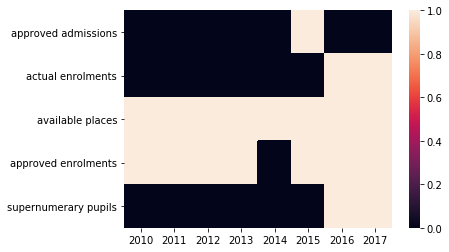

In [200]:
all_ = set([_ for df in dfs.values() for _ in df.keys()])
df = pd.DataFrame.from_dict({
    year: [sn in these_ for sn in all_] 
    for year, these_ in dfs.items()
}, orient='index')
df.columns=all_
sns.heatmap(df.T)

In [201]:
for year,df in dfs.items():
    print(f"{year}:{df.shape}:{','.join(df.keys())}")

2010:(217, 2):approved enrolments,available places
2011:(216, 2):approved enrolments,available places
2012:(215, 2):available places,approved enrolments
2013:(210, 2):available places,approved enrolments
2014:(208, 1):available places
2015:(202, 3):approved admissions,approved enrolments,available places
2016:(201, 4):approved enrolments,actual enrolments,supernumerary pupils,available places
2017:(199, 4):approved enrolments,actual enrolments,supernumerary pupils,available places


In [178]:
Counter([_ for df in dfs.values() for _ in df.keys()])

Counter({'actual enrolments': 2,
         'approved admissions': 1,
         'approved enrolments': 7,
         'available places': 8,
         'supernumerary pupils': 2})

In [179]:
dfs[2017].dtypes

approved enrolments     float64
actual enrolments       float64
supernumerary pupils    float64
available places        float64
dtype: object

In [186]:
available.sum().ix[['approved enrolments','available places']].T

,approved enrolments,available places
2010,159503.0,17780.0
2011,159793.0,19473.0
2012,158906.0,20256.0
2013,156996.0,19599.0
2014,0.0,21151.0
2015,153916.0,20186.0
2016,154131.0,20946.0
2017,154098.0,21022.0


![](img/starman.png)

In [19]:
from collections import defaultdict
import numpy as np
from pathlib import Path
import pandas as pd

## Initialisation and re-walking already extracted
## Datasets.

year_files = defaultdict(list)
dest = Path('./data/education-ni/')
for year_p in dest.iterdir():
    try:
        year=int(year_p.parts[-1])
        for file in year_p.iterdir():
            year_files[year].append(file.parts[-1])
    except ValueError:
        pass
    
year_files = dict(sorted(year_files.items()))
year_files

def parse_fsm_table(xls):
    join_n_strip_n_lower = lambda l: ' '.join(l).strip().lower()
    strip_n_lower = lambda s: s.strip().lower()
    unyearify = lambda s: int(s.replace('year ',''))
    
    if 'free school meals' in xls.sheet_names:
        df = pd.read_excel(xls, 'free school meals', header=None, skip_footer=5)
        h_range = 2 if isinstance(df.ix[3,0], int) else 3
        try:
            df.columns=df.ix[3].fillna('').apply(strip_n_lower).values
            df = df.drop(df.index[0:h_range+1]).reset_index(drop=True)
            df.dropna(how='all', inplace=True, axis=0)
            df['de ref'] = df['de ref'].astype(int)
            df.drop('schoolname',axis=1, inplace=True)
            df.drop('free school meals', axis=1, inplace=True)
            df.set_index('de ref', inplace=True)
            df.replace('#',pd.np.nan, inplace=True) # # = Undisclosed
            df.replace('*',2.0, inplace=True) # * == < 5
            df.replace('!',1, inplace=True) # ! avoid identification, so it's prob one or two
            
            df=df.astype(float)
        except TypeError as e:
            print(e)
    else:
        df=None
    return df

dfs = {}
for year, files in year_files.items():
    for file in files:
        if 'post' in file:
            xls = pd.ExcelFile(f'data/education-ni/{year}/{file}')
            df = parse_fsm_table(xls)
            if df is not None:
                print(f'Got fsm data for {year}')
                dfs[year]=df
fsm = pd.Panel(dfs)

/Users/andrew.bolster/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Got fsm data for 2009
Got fsm data for 2010
Got fsm data for 2011
Got fsm data for 2012
Got fsm data for 2013
Got fsm data for 2014
Got fsm data for 2015
Got fsm data for 2016
Got fsm data for 2017


In [17]:
fsm.to_frame()

2009         2010         2011         2012  \
de ref  minor                                                                   
1210014 pupils              672.000000   688.000000   703.000000   708.000000   
        fsme                132.000000   153.000000   170.000000   183.000000   
        free school meals     0.196429     0.222384     0.241821     0.258475   
1210015 pupils              647.000000   650.000000   649.000000   666.000000   
        fsme                127.000000   141.000000   157.000000   177.000000   
        free school meals     0.196291     0.216923     0.241911     0.265766   
1210021 pupils              963.000000   929.000000   899.000000   930.000000   
        fsme                376.000000   359.000000   367.000000   379.000000   
        free school meals     0.390447     0.386437     0.408231     0.407527   
1210022 pupils              907.000000   932.000000   913.000000   930.000000   
        fsme                363.000000   392.000000   384.000000   390.000000   
        free school meals     0.400221     0.420601     0.420591     0.419355   
1230053 pupils             1547.000000  1530.000000  1530.000000  1521.000000   
        fsme                546.000000   551.000000   578.000000   618.000000   
        free school meals     0.352941     0.360131     0.377778     0.406312   
1230104 pupils              438.000000   429.000000   384.000000   367.000000   
        fsme                184.000000   188.000000   184.000000   192.000000   
        free school meals     0.420091     0.438228     0.479167     0.523161   
1230130 pupils              468.000000   440.000000   406.000000   388.000000   
        fsme                272.000000   244.000000   239.000000   214.000000   
        free school meals     0.581197     0.554545     0.588670     0.551546   
1230146 pupils              508.000000   513.000000   528.000000   529.000000   
        fsme                242.000000   237.000000   245.000000   286.000000   
        free school meals     0.476378     0.461988     0.464015     0.540643   
1230155 pupils             1011.000000  1027.000000  1043.000000  1069.000000   
        fsme                327.000000   349.000000   401.000000   417.000000   
        free school meals     0.323442     0.339825     0.384468     0.390084   
1230182 pupils             1116.000000  1088.000000  1088.000000  1098.000000   
        fsme                348.000000   348.000000   359.000000   386.000000   
        free school meals     0.311828     0.319853     0.329963     0.351548   
...                                ...          ...          ...          ...   
5410013 pupils             1311.000000  1325.000000  1324.000000  1331.000000   
        fsme                 38.000000    46.000000    48.000000    56.000000   
        free school meals     0.028986     0.034717     0.036254     0.042074   
5410057 pupils              432.000000   438.000000   455.000000   457.000000   
        fsme                 20.000000    27.000000    24.000000    21.000000   
        free school meals     0.046296     0.061644     0.052747     0.045952   
5410067 pupils              789.000000   788.000000   780.000000   778.000000   
        fsme                 27.000000    35.000000    31.000000    34.000000   
        free school meals     0.034221     0.044416     0.039744     0.043702   
5420045 pupils              586.000000   587.000000   585.000000   587.000000   
        fsme                 76.000000    79.000000    71.000000    85.000000   
        free school meals     0.129693     0.134583     0.121368     0.144804   
5420059 pupils              880.000000   887.000000   894.000000   907.000000   
        fsme                 77.000000    88.000000    85.000000    87.000000   
        free school meals     0.087500     0.099211     0.095078     0.095921   
5420060 pupils              861.000000   861.000000   864.000000   861.000000   
        fsme                 71.000000    77.000000    80.000000 

## New heading

In [ ]:
dfs[2016]

In [ ]:
Counter(reference[:,:,'school management type'].values.ravel('k'))

In [ ]:
reference[:,:,'school management type'].apply(Counter, axis=0)

In [ ]:
categories=pd.DataFrame.from_dict({
    year: dict(c)
    for year,c in reference[:,:,'school management type'].apply(Counter, axis=0).iteritems()
})
categories.plot.bar()

In [ ]:
pd.DataFrame.from_dict({
    category:
    enrolements[:,(reference.minor_xs('school management type')==category).any(axis=1),:].sum().sum()
    for category in categories.drop(np.nan).index
}).plot()

In [ ]:
enrolements.sum().sum().plot()

In [ ]:

Counter(reference.minor_xs('town').values.ravel('k'))

In [ ]:
gazetteer = "45341066-1998-4116-b234-6223e7e19397"
gztr = pd.DataFrame.from_records(dataset_generator(gazetteer))
gztr

In [ ]:
gztr['town'] = gztr['PLACENAME'].str.lower()
town_lookup = gztr.set_index('town')[['X','Y']]
town_lookup

In [ ]:
for town, n in Counter(reference.minor_xs('town').values.ravel('k')).items():
    if town not in town_lookup.index:
        print(f"{town}:{n}")

In [ ]:
from shapely.geometry import Point
from pyproj import Proj, transform
prj_wgs = Proj(proj='latlong',datum='WGS84')
prj_itm = Proj(init='EPSG:29903')

def apply_itm_to_wgs(row, e='eastings', n='northings'):
    eastings, northings = row[e], row[n]
    if eastings is not None and northings is not None: 
        long,lat = transform(prj_itm, prj_wgs, eastings, northings)
    else:
        long,lat = None,None
        
    return pd.Series({'latitude':lat,'longitude':long})
town_lookup = gpd.GeoDataFrame(town_lookup, crs={'init': 'epsg:4326'},
                               geometry=town_lookup.apply(lambda r: Point(apply_itm_to_wgs(r, e='Y',n='X')), axis=1))
town_lookup.plot()

In [ ]:
categories = set(reference.minor_xs('town').values.ravel('k'))
df= pd.DataFrame.from_dict({
    category:
    enrolements[:,(reference.minor_xs('town')==category).any(axis=1),:].sum().sum()
    for category in categories
}).T.drop(np.nan)


In [ ]:
town_stats = gpd.GeoDataFrame(geometry=town_lookup.apply(lambda r: Point(apply_itm_to_wgs(r, e='Y',n='X')), axis=1))
town_stats['mean_enrolment'] = df.mean(axis=1)
town_stats['2017_change'] = (-1+df[2017]/df.mean(axis=1))
town_stats.plot(column='2017_change')

In [ ]:
constituency_shp = 'http://osni-spatial-ni.opendata.arcgis.com/datasets/563dc2ec3d9943428e3fe68966d40deb_3.zip'
urllib.request.urlretrieve(constituency_shp, 'data/constituency.zip')
import zipfile
with zipfile.ZipFile('data/constituency.zip','r') as z:
    z.extractall('data/')

In [ ]:
import geopandas as gpd
df = gpd.GeoDataFrame.from_file('data/OSNI_Open_Data_Largescale_Boundaries__Parliamentary_Constituencies_2008.shp')
df